## Karakas 2010 yields from MCMC

Using all default settings. Time taken was 4299.766675710678  seconds

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Output from mcmc

[array([[-2.70296043, -3.07486087, -0.75194978, -0.29123924,  0.51871529,
          0.50217262]]),
 'initial minimization',
 (array([-2.68304278, -3.0362274 , -0.77824288]), 1.069812759180552),
 'step 1 global minimization',
 array([[-2.68304278, -3.0362274 , -0.77824288, -0.32036316,  0.49277952,
          0.45195536]]),
 'step 1 local minimization',
 (array([-2.72857389, -3.08996898, -0.79428642]), 1.1084093390131533),
 'step 2 global minimization',
 array([[-2.72857389, -3.08996898, -0.79428642, -0.3435005 ,  0.44715179,
          0.41429241]]),
 'step 2 local minimization',

[1.069812759180552, 1.1084093390131533]]


In [ ]:
from Chempy.plot_mcmc import restructure_chain
restructure_chain('karakas10/')

In [ ]:
from Chempy.plot_mcmc import plot_mcmc_chain_with_prior
plot_mcmc_chain_with_prior('karakas10/',use_prior = True, only_first_star = False,plot_true_parameters = False,plot_only_SSP_parameter = False)

In [108]:
%pylab inline
from Chempy.cem_function import cem2, extract_parameters_and_priors
from Chempy.parameter import ModelParameters
a=ModelParameters()
a.p0 = np.array([-2.63,-2.81,-0.83,-0.29,0.55,0.50]) # Parameters found by model
a = extract_parameters_and_priors(a.p0, a) # To update to new model
abundances, names = cem2(a) # predict abundances


Populating the interactive namespace from numpy and matplotlib


/home/philcox/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))


**Not being used at the moment**

%pylab inline
from Chempy.parameter import ModelParameters
from Chempy.cem_function import posterior_function_predictions
a=ModelParameters()
a.p0 = np.array([-2.63,-2.81,-0.83,-0.29,0.55,0.50]) # Parameters found by model
posterior, abundances, names = posterior_function_predictions(a.p0,a)



proto_sun = np.load('Chempy/input/stars/Proto-sun.npy')
proto_sun_abundance=[]
proto_sun_error=[]
for item in names:
    temp_abundance = proto_sun[0][item]
    temp_error = proto_sun[1][item]
    proto_sun_abundance.append(temp_abundance)
    proto_sun_error.append(temp_error)
    

fig = plt.figure(figsize=(30.69,8.27), dpi=100)
ax = fig.add_subplot(111)
plt.plot(np.arange(len(names)),abundances,label='Final model abundances',linestyle='-') # Plot model data
plt.errorbar(np.arange(len(a.element_names)),sun_list,xerr=None,yerr=sol_error,linestyle = '',mew=3,marker='x',capthick =3,capsize = 20, ms = 10,elinewidth=3,label='solar')
plt.ylim((-0.5,0.5))
abundance_names = ['[%s/H]' %(item) for item in a.element_names]
plt.xticks(np.arange(len(a.element_names)),abundance_names)
plt.ylabel("abundance relative to solar in dex")
plt.xlabel("Element")

### Check protosolar abundances - use these or those in input/stars/Proto_solar.npy

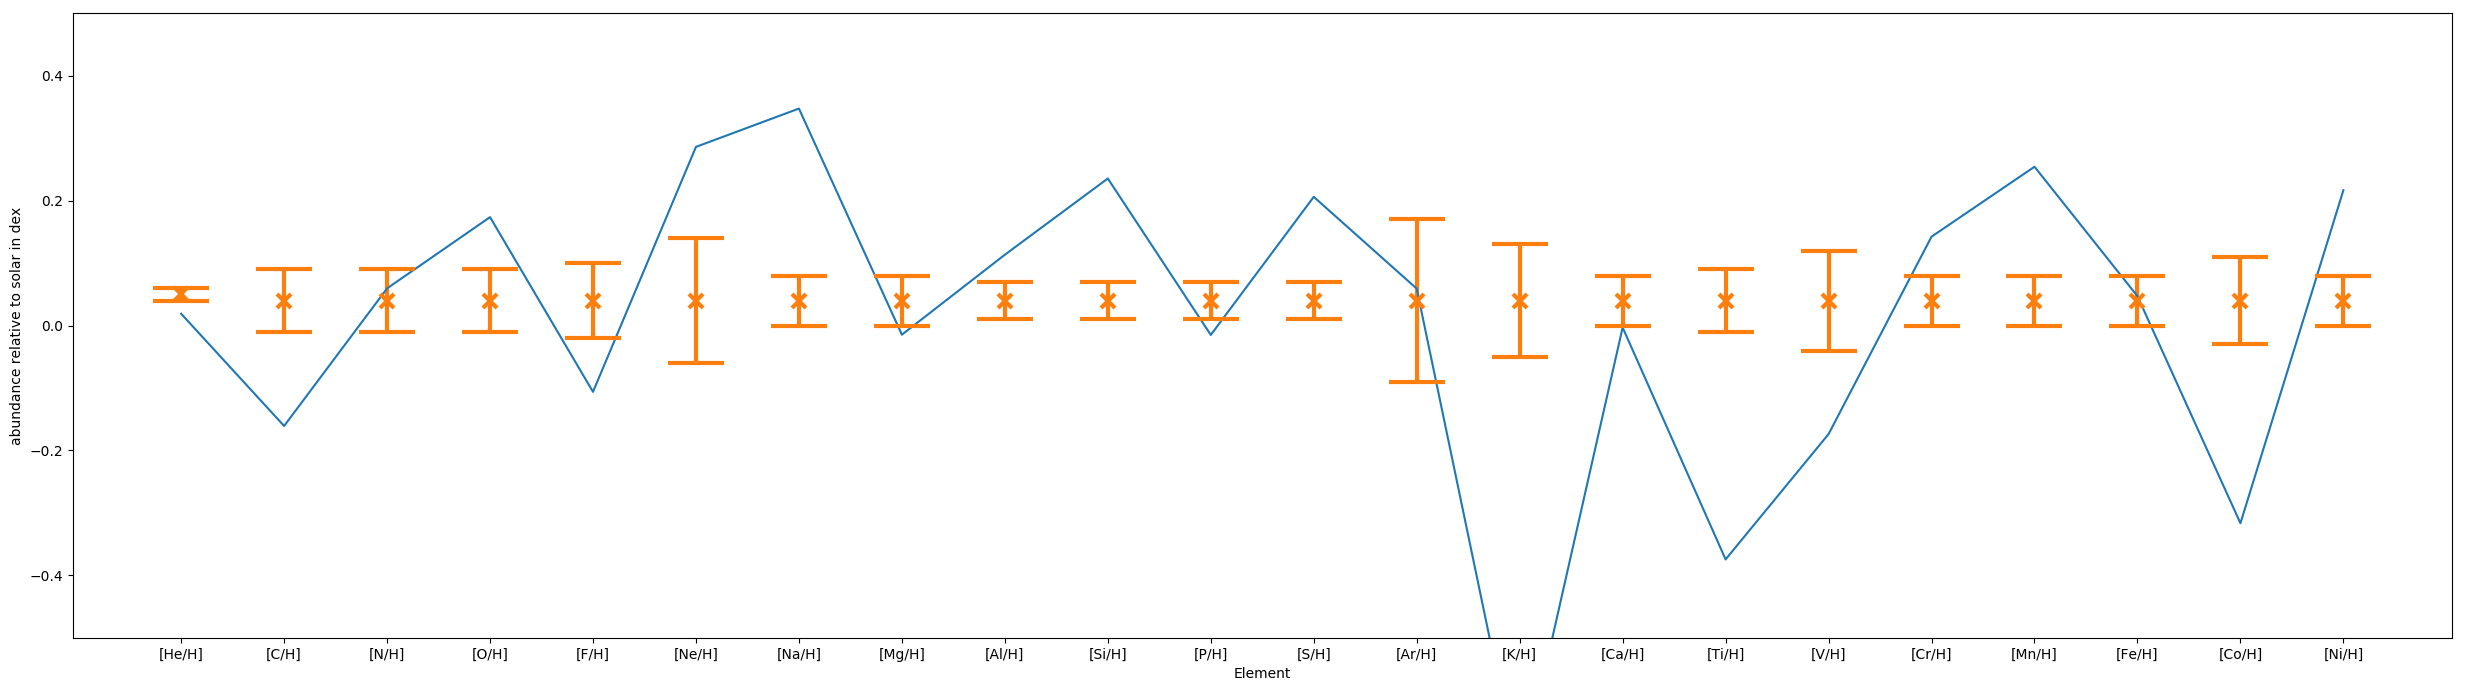

In [109]:
## CREATE PLOT OF RESULTS vs PROTOSOLAR ABUNDANCES

from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar,'Asplund09')()
sol_table = basic_solar.table
names = np.asarray(names)
abundances = np.asarray(abundances)

abundance_list = [] # To reorder abundance data
sol_error = [] # Solar data
sun_list = []

for i,item in enumerate(a.element_names):
    temp_error = sol_table['error'][np.where(sol_table['Symbol']==item)]
    temp_abundance = abundances[np.where(names==item)]
    sol_error.append(temp_error)
    abundance_list.append(temp_abundance)
    if item != "C+N":
        if item == 'He':
            sun_list.append(0.05)
        else:
            sun_list.append(0.04) ## add 0.04dex to get protosolar abundances (Asplund 2009)
    else:
        sun_list.append(np.log10(2.)) 
        
fig = plt.figure(figsize=(30.69,8.27), dpi=100)
ax = fig.add_subplot(111)
plt.plot(np.arange(len(a.element_names)),abundance_list,label='Final model abundances',linestyle='-') # Plot model data
plt.errorbar(np.arange(len(a.element_names)),sun_list,xerr=None,yerr=sol_error,linestyle = '',mew=3,marker='x',capthick =3,capsize = 20, ms = 10,elinewidth=3,label='solar')
plt.ylim((-0.5,0.5))
abundance_names = ['[%s/H]' %(item) for item in a.element_names]
plt.xticks(np.arange(len(a.element_names)),abundance_names)
plt.ylabel("abundance relative to solar in dex")
plt.xlabel("Element")

**Test log(posterior) - different to MCMC output???**

In [107]:


from Chempy.cem_function import posterior_function_predictions
posterior, abundances, names = posterior_function_predictions(a.p0,a)
print(posterior)

/home/philcox/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))


14.9560489389


**Test effect of turning off model error - GET THIS WORKING**

In [111]:


a.error_marginalization = False
a.zero_model_error = True
posterior, abundances, names = posterior_function_predictions(a.p0,a)
print(posterior)

/home/philcox/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))


14.9560489389
